In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

In [2]:
df=pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [5]:
spam_ratio = len(df[df['Category'] == 'spam']) / len(df)
print(f"{spam_ratio:.2%} spam emails")

13.41% spam emails


In [6]:
df_spam = df[df['Category'] == 'spam']
df_ham = df[df['Category'] == 'ham']

In [7]:
df_ham_downsampled = df_ham.sample(len(df_spam))

In [8]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced['spam'] = df_balanced['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'], test_size=0.2)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [11]:
X_train.head()

,Message
1068,Someone U know has asked our dating service 2 ...
3451,Ugh just got outta class
1481,"I'm a guy, browsin is compulsory"
453,Ok i will tell her to stay out. Yeah its been ...
629,Todays Vodafone numbers ending with 4882 are s...


In [12]:
!pip install transformers

In [13]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

In [14]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [15]:
def get_sentence_embedding(sentences):
    inputs = tokenizer(sentences, return_tensors='tf', padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    return tf.reduce_mean(outputs.last_hidden_state, axis=1)



In [16]:
sample_text = ["banana", "grape", "mango", "Jeff Bezos", "Elon Musk", "Bill Gates"]
embeddings = get_sentence_embedding(sample_text)

print("Embeddings shape:", embeddings.shape)
print("Embeddings:", embeddings.numpy())


Embeddings shape: (6, 768)
Embeddings: [[-0.1673078  -0.12411109 -0.21699    ...  0.16821508  0.07815273
  -0.05040708]
 [-0.09840381 -0.25089782 -0.17563154 ...  0.19677092  0.11432543
   0.0547897 ]
 [ 0.03156308  0.18684544 -0.02911798 ...  0.13546556 -0.01333271
  -0.22378443]
 [-0.03114693 -0.04255027 -0.29246327 ...  0.05424572  0.15129691
  -0.1845615 ]
 [-0.00585027  0.44049755 -0.1802777  ... -0.33333728  0.07395917
  -0.1552067 ]
 [-0.09177178 -0.02849986 -0.11938781 ...  0.17096905 -0.01895465
  -0.1562435 ]]


In [17]:
def get_sentence_embedding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [18]:
similarity = cosine_similarity([embeddings[0]], [embeddings[1]])
print(f"Cosine Similarity: {similarity}")

Cosine Similarity: [[0.9050406]]


In [19]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
X_test = ["Your test sentence here", "Another test sentence here"]
y_test = [0, 1]


In [21]:
inputs = tokenizer(X_test, padding=True, truncation=True, return_tensors='tf')

In [22]:
outputs = model(inputs)
logits = outputs.logits

In [23]:
num_examples = logits.shape[0]

In [24]:
logits = tf.reshape(logits, (num_examples, -1))
y_predicted = tf.nn.sigmoid(logits).numpy()

In [25]:
if y_predicted.shape[1] == 1:
    y_predicted = y_predicted.flatten()
    y_predicted = np.where(y_predicted > 0.5, 1, 0)
else:
    y_predicted = np.argmax(y_predicted, axis=1)

In [26]:
print("Length of y_test:", len(y_test))
print("Length of y_predicted:", len(y_predicted))

Length of y_test: 2
Length of y_predicted: 2


In [27]:
if len(y_test) != len(y_predicted):
    raise ValueError(f"Length mismatch: y_test has {len(y_test)} samples, but y_predicted has {len(y_predicted)} samples.")



In [28]:
cm = confusion_matrix(y_test, y_predicted)

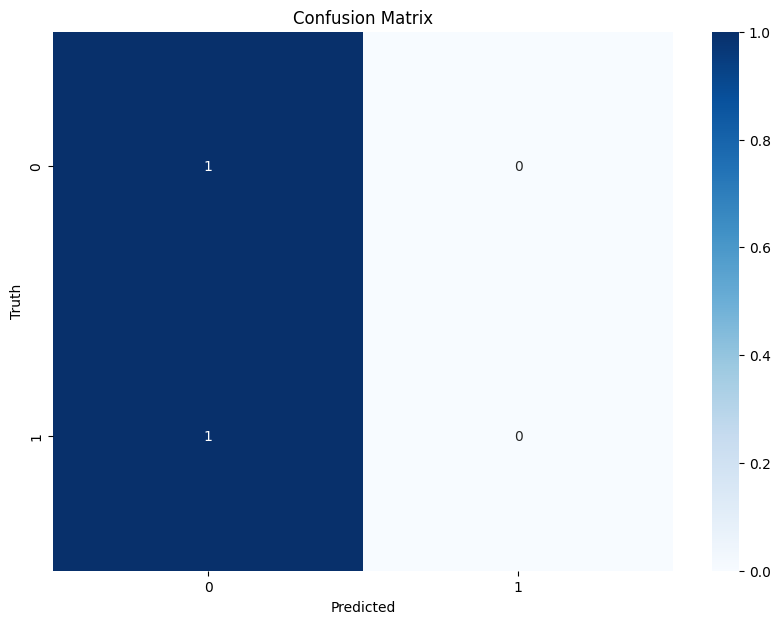

In [29]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until March 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline.',
    'Hey Sam, Are you coming for a cricket game tomorrow?'
]

In [32]:
new_inputs = tokenizer(reviews, padding=True, truncation=True, return_tensors='tf')
new_outputs = model(new_inputs)
new_logits = new_outputs.logits
new_logits = tf.reshape(new_logits, (new_logits.shape[0], -1))
new_predictions = tf.nn.sigmoid(new_logits).numpy()
new_predictions = np.where(new_predictions > 0.5, 1, 0)

print("Predictions for new reviews:", new_predictions)


Predictions for new reviews: [[0 0]
 [0 0]
 [0 0]]
